Enter here

<h1>Forecasting number of Air Passengers for next 1 years</h1>

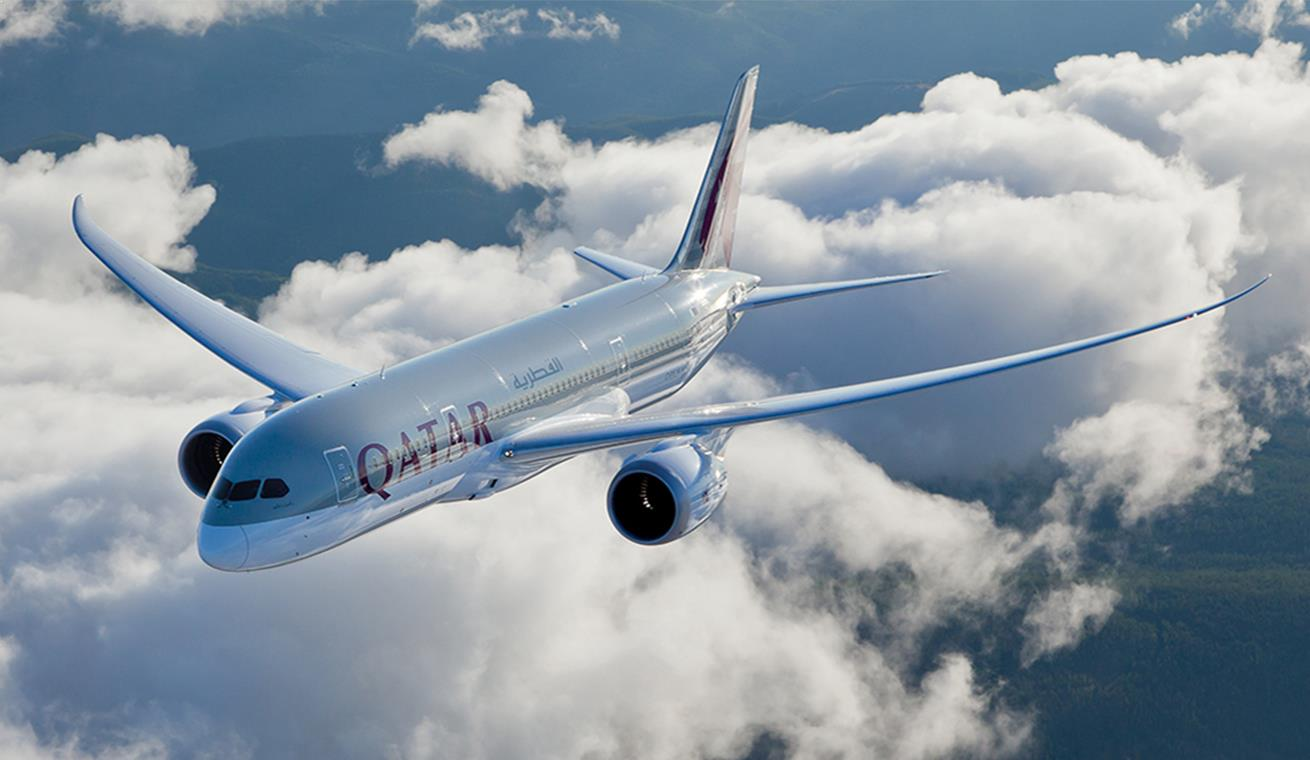

- Importing all the required libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

- Reading the dataset file and checking the size of file

In [2]:
data=pd.read_csv(r'Data\burhannagar.csv')
data.shape

(394, 2)

In [3]:
WINDOW_SIZE = 14

- Creating the 'Date' as Index for data and viewing the dataset

In [4]:
data['date']=pd.to_datetime(data['date'], infer_datetime_format=True)
data=data.set_index(['date'])
print(data.head())
print(data.tail())

            weight
date              
2020-02-01    3071
2020-02-02    4479
2020-02-03    3157
2020-02-04    4676
2020-02-05    4006
            weight
date              
2021-02-24    5092
2021-02-25    3639
2021-02-26    4824
2021-02-27    5198
2021-02-28    3657


- Visualizing the Time Series plot for the number of Air Passengers 

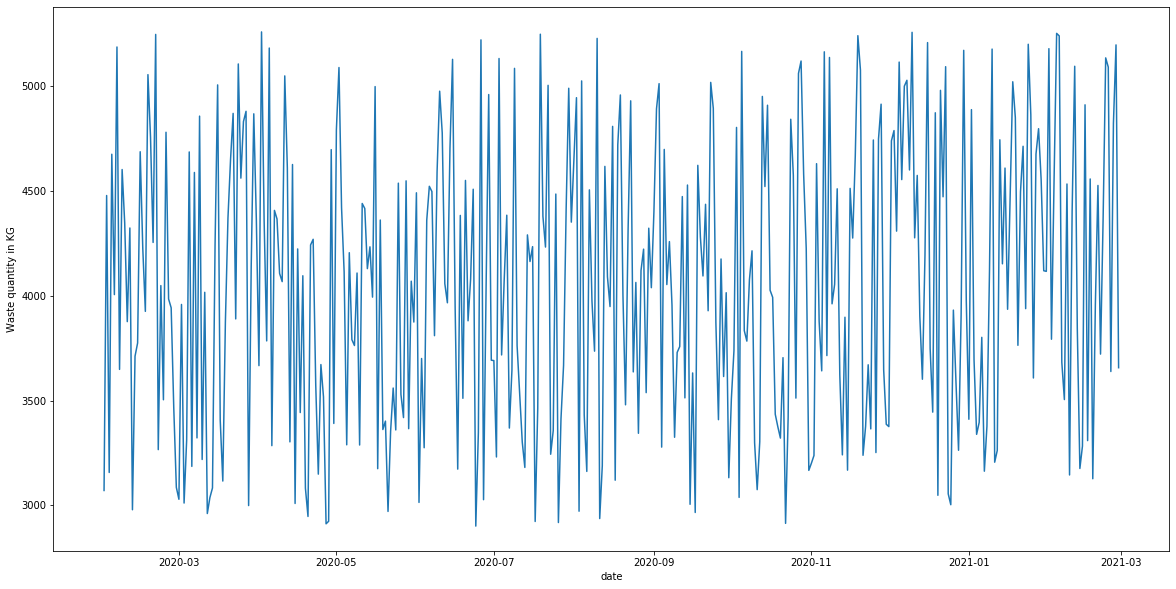

In [5]:
plt.figure(figsize=(20,10))
plt.xlabel("date")
plt.ylabel("Waste quantity in KG")
plt.plot(data)

- As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time
- Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

In [6]:
rolmean=data.rolling(window=WINDOW_SIZE).mean()
rolstd=data.rolling(window=WINDOW_SIZE).std()
print(rolmean.head(15))
print(rolstd.head(15))

                 weight
date                   
2020-02-01          NaN
2020-02-02          NaN
2020-02-03          NaN
2020-02-04          NaN
2020-02-05          NaN
2020-02-06          NaN
2020-02-07          NaN
2020-02-08          NaN
2020-02-09          NaN
2020-02-10          NaN
2020-02-11          NaN
2020-02-12          NaN
2020-02-13          NaN
2020-02-14  3988.857143
2020-02-15  4104.357143
                weight
date                  
2020-02-01         NaN
2020-02-02         NaN
2020-02-03         NaN
2020-02-04         NaN
2020-02-05         NaN
2020-02-06         NaN
2020-02-07         NaN
2020-02-08         NaN
2020-02-09         NaN
2020-02-10         NaN
2020-02-11         NaN
2020-02-12         NaN
2020-02-13         NaN
2020-02-14  654.791671
2020-02-15  622.238713


- Plotting the Rolling Mean and Standard Deviation, which has window of 12
- By looking below plot, we conclude that, it is non-stationary bcoz mean and variance is not constant

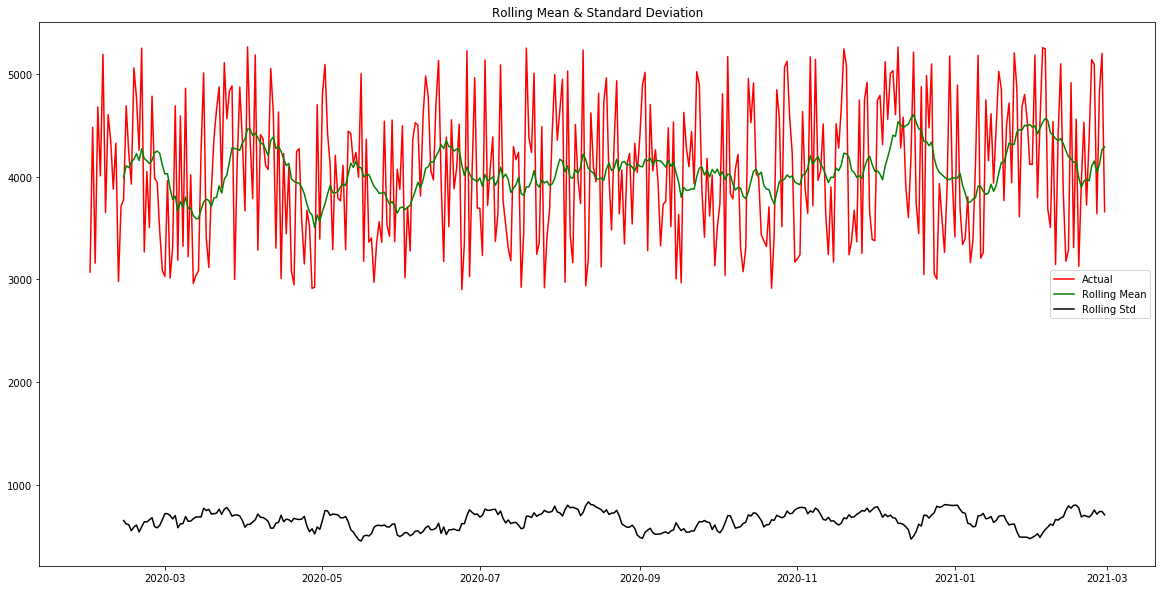

In [7]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
- ADF has : 
<b>Null hypothesis         - Time Series is non-stationary</b>

In [8]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['weight'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic         -9.746057e+00
p-value                 8.250276e-17
Lags Used               2.000000e+00
No. of Obs              3.910000e+02
Critical Value (1%)    -3.447186e+00
Critical Value (5%)    -2.868960e+00
Critical Value (10%)   -2.570723e+00
dtype: float64


- From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

- Below we took log transformation to make our Time series stationary and plotted visual for it
- We found graph upward trending over time with seasonality 

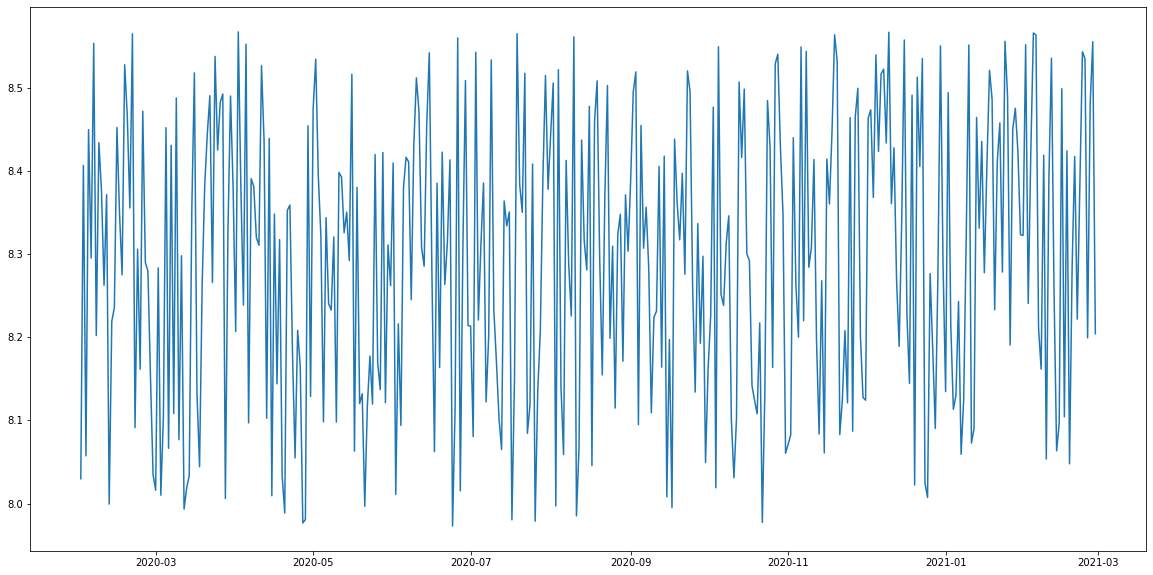

In [9]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

- Testing Rolling Mean with window 12 on above log transformation and concluded non-stationary, again

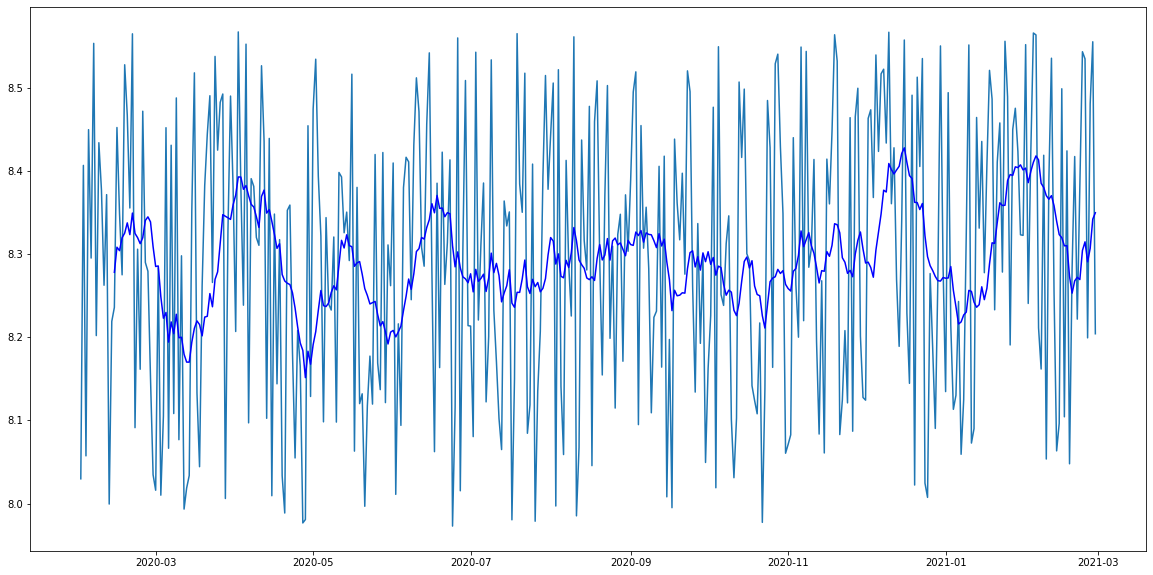

In [10]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=WINDOW_SIZE).mean()
MStd=data_log.rolling(window=WINDOW_SIZE).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

- Using another method differencing, to make our time series stationary

In [11]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

weight
date              
2020-02-01     NaN
2020-02-02     NaN
2020-02-03     NaN
2020-02-04     NaN
2020-02-05     NaN
2020-02-06     NaN
2020-02-07     NaN
2020-02-08     NaN
2020-02-09     NaN
2020-02-10     NaN
2020-02-11     NaN
2020-02-12     NaN

- Output of differencing method, after dropping null values

In [12]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

weight
date                
2020-02-14 -0.042263
2020-02-15  0.144128
2020-02-16  0.044751
2020-02-17 -0.044692
2020-02-18  0.202682

- Defining function for Rolling Mean and Standard Deviation & ADF test

In [13]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['weight'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

- Checking the stationarity of differenced data
- From Rolling method, we see that Mean and standard deviation is not varying.
- From ADF, we reject the null hypothesis bcoz p-value is less than 0.05 (significance level)
- Applying all the transformation and methods, our differenced data is now stationary

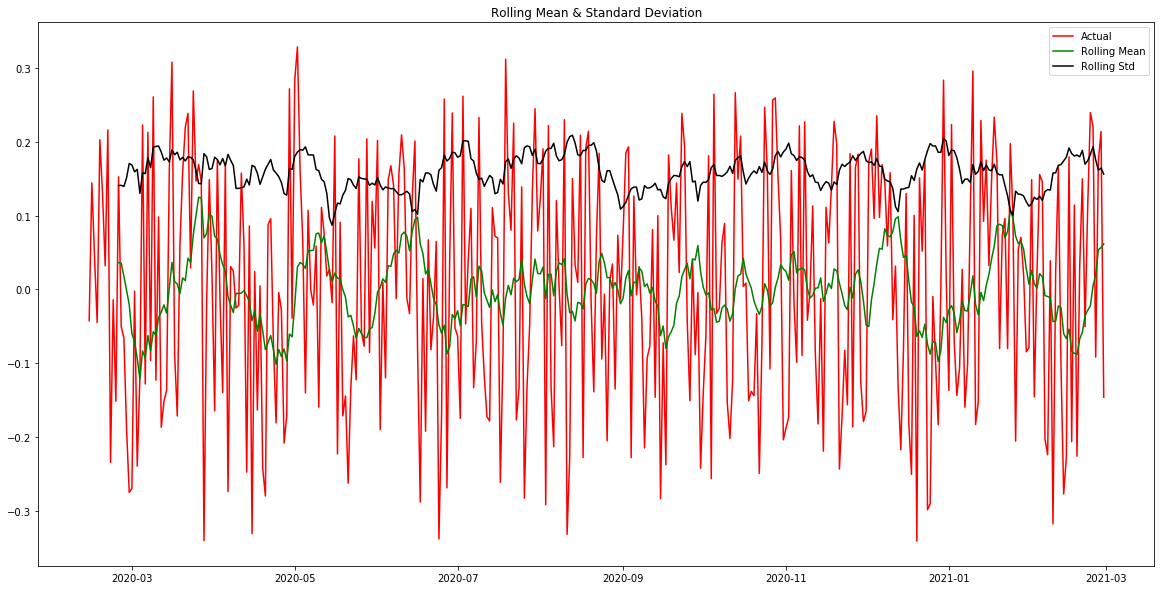

Dickey-Fuller Test: 
Test Statistic          -19.078929
p-value                   0.000000
Lags Used                 0.000000
No. of Obs              380.000000
Critical Value (1%)      -3.447676
Critical Value (5%)      -2.869176
Critical Value (10%)     -2.570838
dtype: float64


In [14]:
stationarity(data_log_diff)

- Checking for Trend stationarity and performing exponential transformation on our data

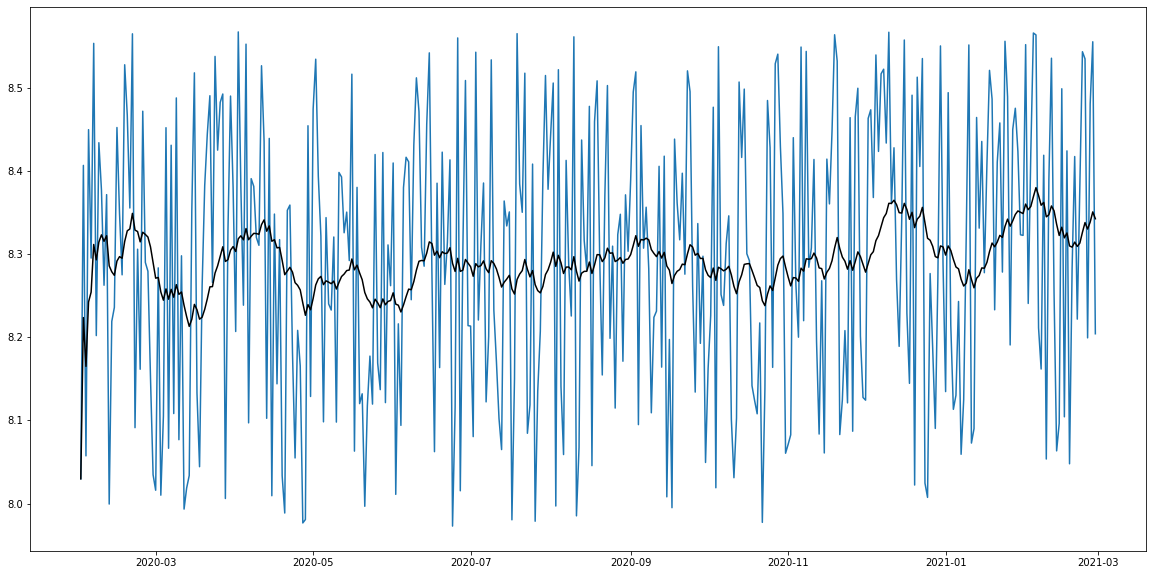

In [15]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

- Since log transformation is non-stationary, applying differencing on our data.

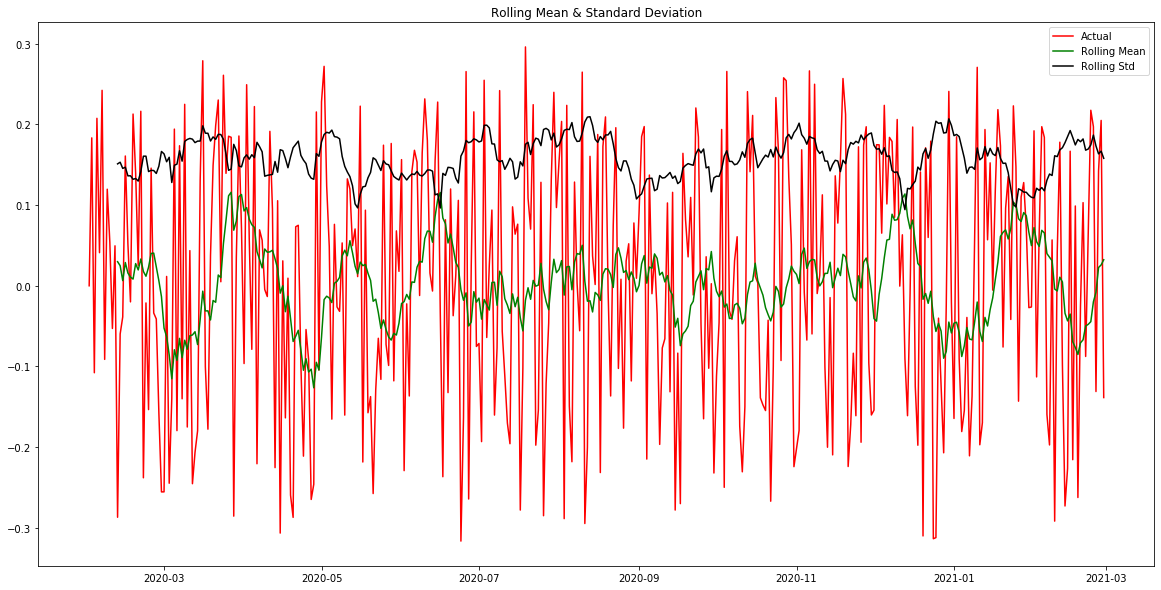

Dickey-Fuller Test: 
Test Statistic          -19.596482
p-value                   0.000000
Lags Used                 0.000000
No. of Obs              393.000000
Critical Value (1%)      -3.447099
Critical Value (5%)      -2.868923
Critical Value (10%)     -2.570703
dtype: float64


In [16]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

- From above graph and ADF test, we conclude, it is trend stationary

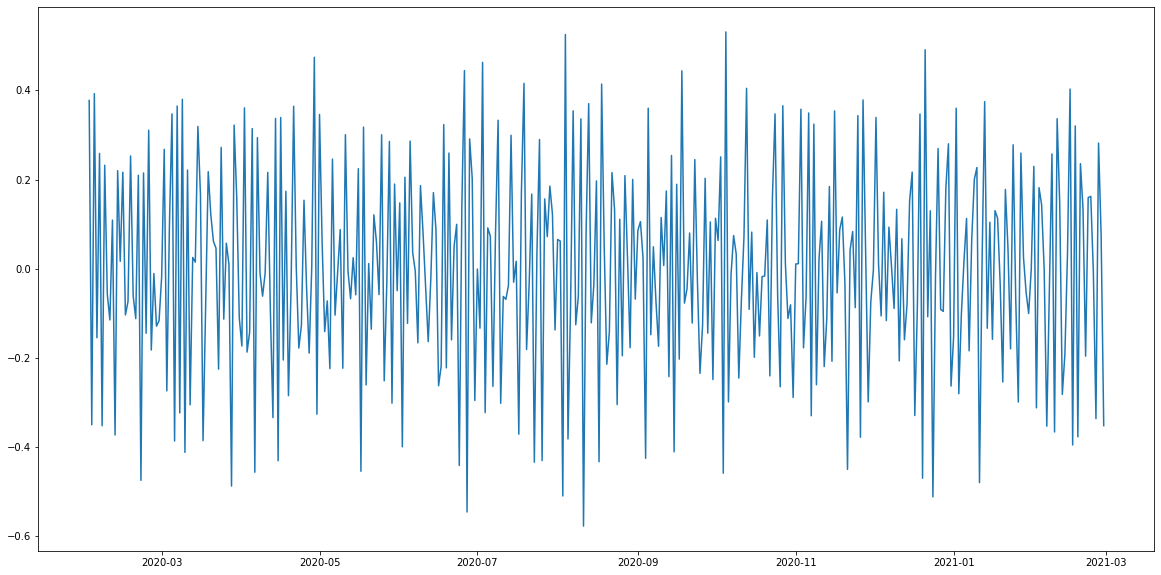

In [17]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

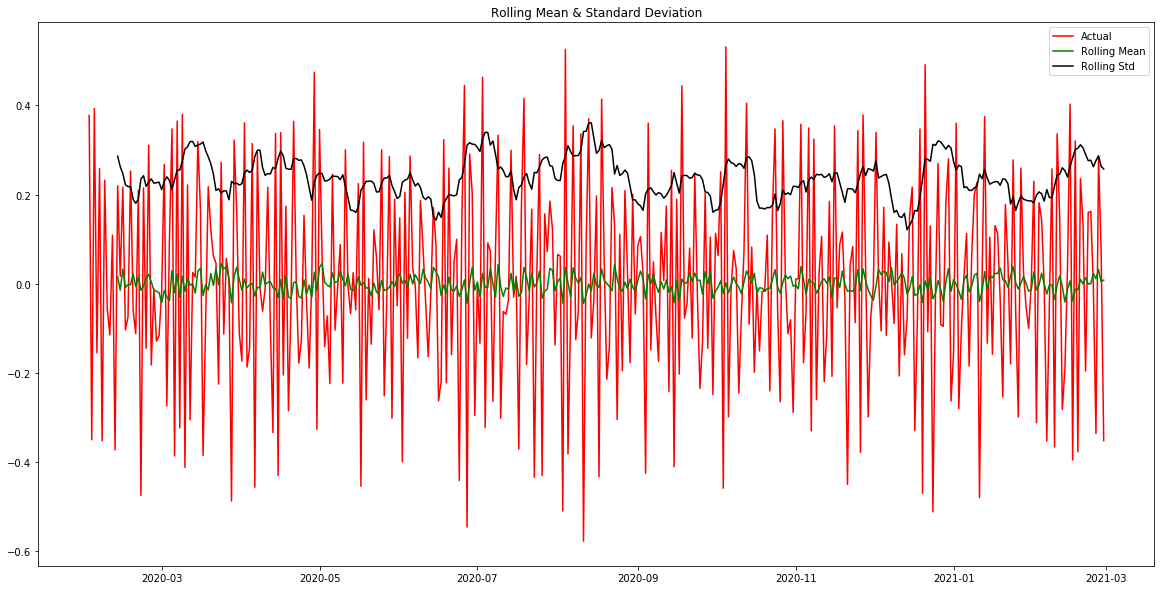

Dickey-Fuller Test: 
Test Statistic         -1.212643e+01
p-value                 1.776326e-22
Lags Used               9.000000e+00
No. of Obs              3.830000e+02
Critical Value (1%)    -3.447540e+00
Critical Value (5%)    -2.869116e+00
Critical Value (10%)   -2.570806e+00
dtype: float64


In [18]:
data_shift=data_shift.dropna()
stationarity(data_shift)

- Decomposing Time Series into its components : Trend, Seasonality and Residual

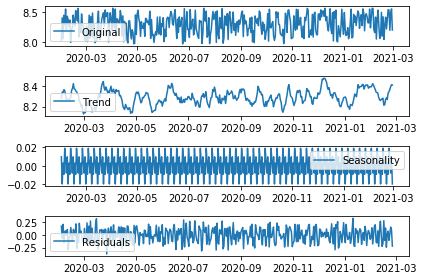

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- Checking the stationarity of Time Series components

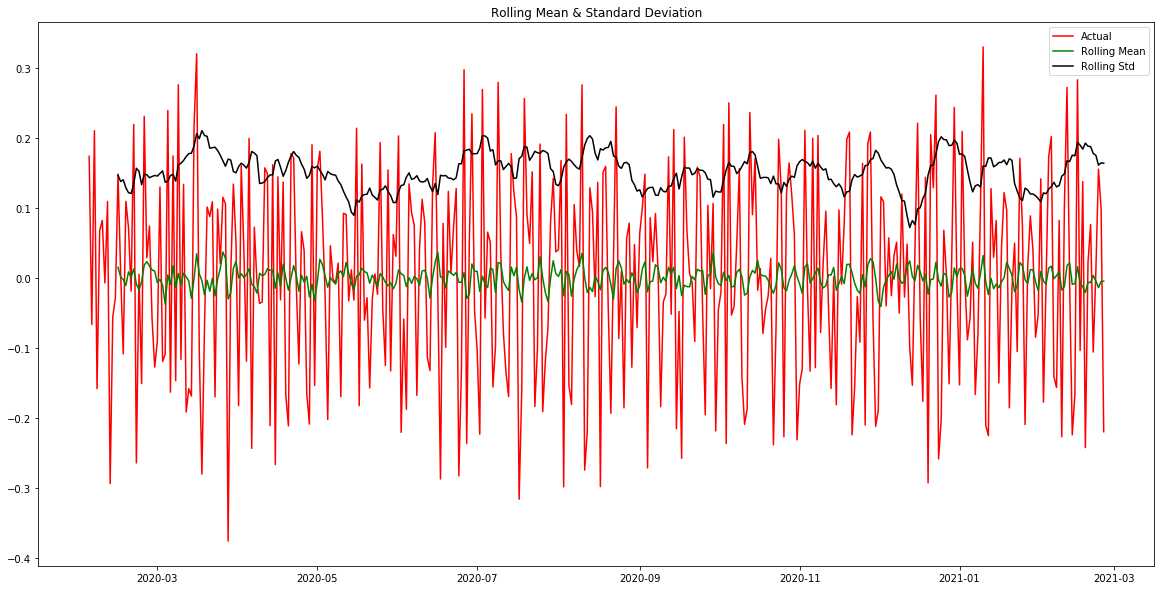

Dickey-Fuller Test: 
Test Statistic         -9.089882e+00
p-value                 3.849865e-15
Lags Used               1.700000e+01
No. of Obs              3.700000e+02
Critical Value (1%)    -3.448148e+00
Critical Value (5%)    -2.869383e+00
Critical Value (10%)   -2.570948e+00
dtype: float64


In [20]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

- Plotting the ACF and PACF to find q and p value
- We got q and p both 2 from the graph

Text(0.5, 1.0, 'Partial Autocorrelation Function')

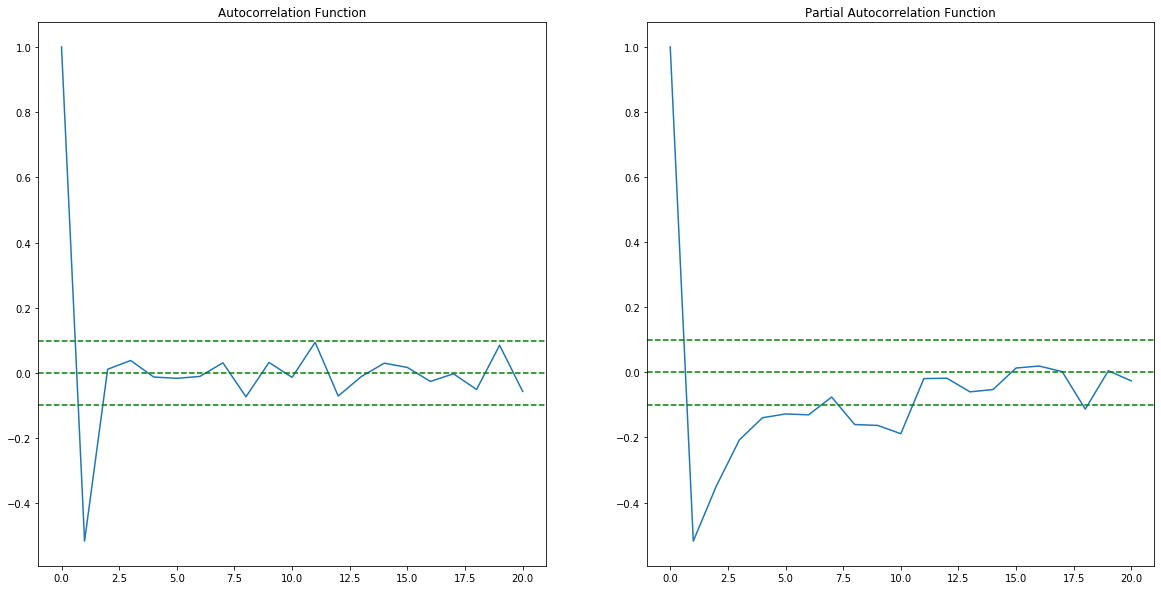

In [21]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

- Building the ARIMA model with p=2, q=2 and I=1

D:\SYSTEM\Programs\Anacodna\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\SYSTEM\Programs\Anacodna\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


plotting ARIMA model


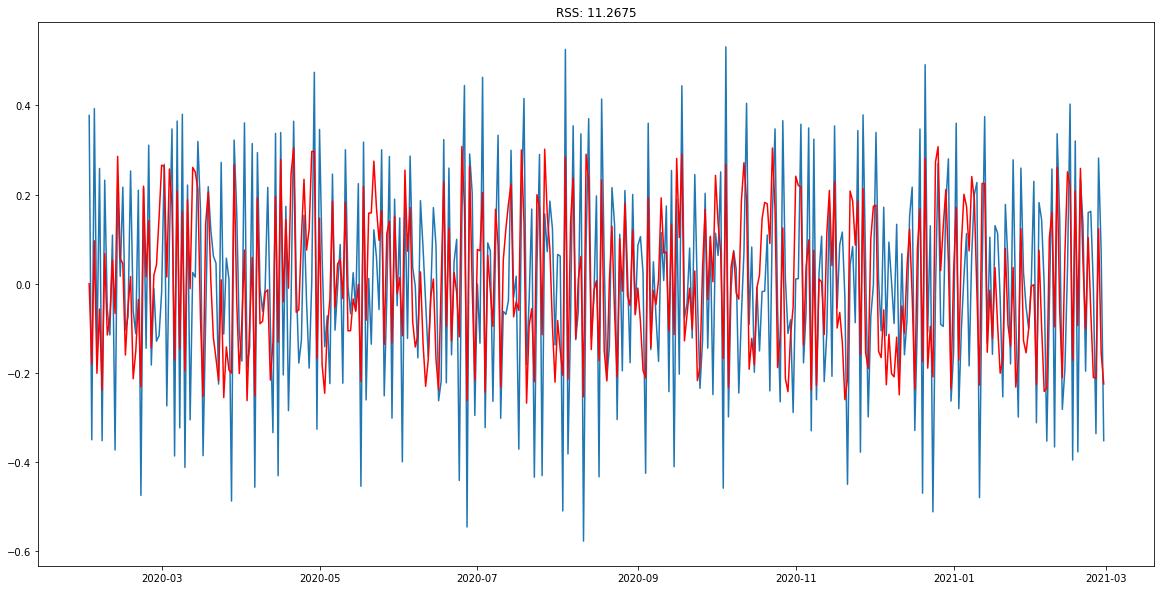

In [22]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['weight'])**2))
print('plotting ARIMA model')

- Predicted values from ARIMA model in difference form

In [23]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

date
2020-02-02    0.000154
2020-02-03   -0.180327
2020-02-04    0.096343
2020-02-05   -0.200531
2020-02-06   -0.056651
dtype: float64


- Performing Inverse Transformation for differencing, by doing cumulative sum

In [24]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

date
2020-02-02    0.000154
2020-02-03   -0.180173
2020-02-04   -0.083830
2020-02-05   -0.284361
2020-02-06   -0.341011
dtype: float64


- Below is data display of predicted value in log scale

In [25]:
predictions_log=pd.Series(data_log['weight'].ix[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

date
2020-02-01    8.029759
2020-02-02    8.029913
2020-02-03    7.849586
2020-02-04    7.945929
2020-02-05    7.745398
dtype: float64

Taking out log transformation and visualizing actual vs predicted value graph

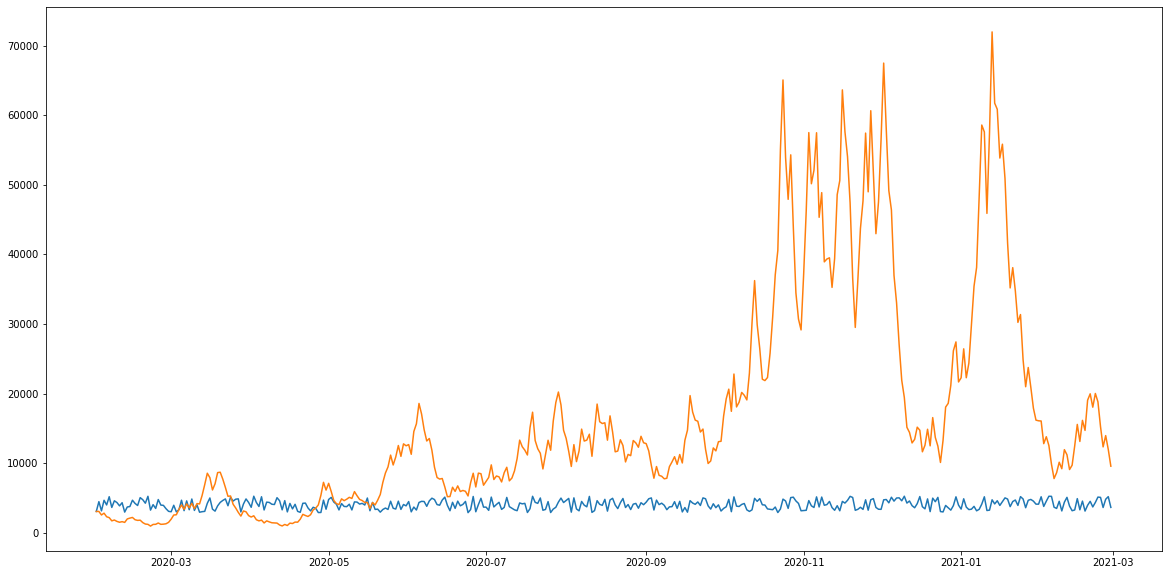

In [26]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

- Plotting the visual for forecast of next 10 years with 95% confidence interval

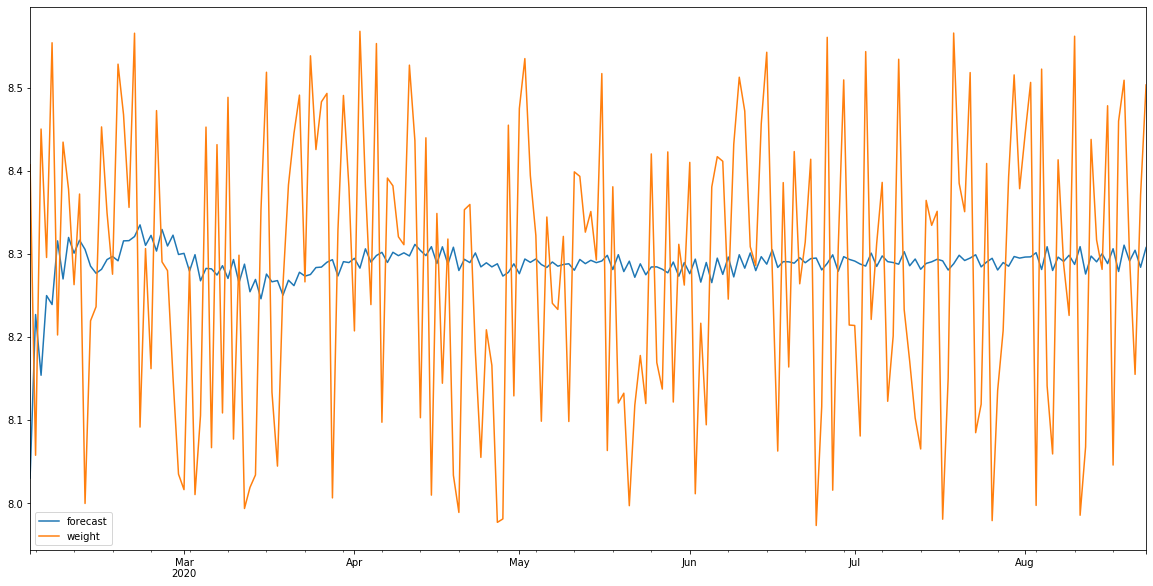

In [27]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

- Next 10 years predicted value on log scale

In [28]:
x[0]

array([8.31854565, 8.32875059, 8.32171655, 8.32849715, 8.32257714,
       8.32830056, 8.32334915, 8.32818454, 8.32404729, 8.32813625,
       8.32468333, 8.32814489, 8.32526718, 8.32820138, 8.32580716,
       8.32829809, 8.32631026, 8.3284286 , 8.32678237, 8.32858754,
       8.32722842, 8.32877036, 8.32765258, 8.32897325, 8.32805833,
       8.32919303, 8.3284486 , 8.32942698, 8.32882588, 8.32967286,
       8.32919222, 8.32992876, 8.32954938, 8.33019308, 8.32989881,
       8.33046449, 8.33024175, 8.33074184, 8.33057924, 8.3310242 ,
       8.33091214, 8.33131076, 8.33124118, 8.33160085, 8.33156699,
       8.33189392, 8.33189007, 8.33218948, 8.33221086, 8.33248715,
       8.33252973, 8.33278657, 8.33284698, 8.33308748, 8.33316287,
       8.33338964, 8.33347762, 8.33369284, 8.3337914 , 8.33399692,
       8.33410438, 8.33430174, 8.33441669, 8.33460719, 8.33472842,
       8.33491316, 8.33503967, 8.33521957, 8.33535052, 8.33552634,
       8.33566103, 8.33583343, 8.33597125, 8.33614078, 8.33628

- Actual predicted value for next 10 years, after taking out log transformation

In [29]:
np.exp(x[0])

array([4099.19399848, 4141.2401949 , 4112.21278612, 4140.19077282,
       4115.75323817, 4139.37694966, 4118.9318705 , 4138.89672592,
       4121.80844851, 4138.6968584 , 4124.4309221 , 4138.73260818,
       4126.83966557, 4138.96640847, 4129.06866715, 4139.36670819,
       4131.14653355, 4139.90700398, 4133.09733809, 4140.56502935,
       4134.94133634, 4141.32207496, 4136.69556959, 4142.16241879,
       4138.37437353, 4143.0728479 , 4139.98980685, 4144.04225724,
       4141.55201216, 4145.06131276, 4143.06952002, 4146.12216859,
       4144.54950478, 4147.21822947, 4145.99799993, 4148.34395119,
       4147.42007941, 4149.49467297, 4148.82001003, 4150.66647658,
       4150.20137983, 4151.85606798, 4151.56720597, 4153.06067781,
       4152.92002553, 4154.27797781, 4154.26197186, 4155.50601053,
       4155.59483885, 4156.74313025, 4156.92013488, 4157.98795335,
       4158.23912827, 4159.23931653, 4159.5528855 , 4160.49624176,
       4160.86230331, 4161.75790673, 4162.16813572, 4163.02362

<b>*************************End****************************</b>